## Övning 1 Cities in Sweden - Create Dataset

In [336]:
# Övning 1a) Create a DataFrame
import pandas as pd

data_cities = {
    'Kommun': ["Malmö", "Stockholm", "Uppsala", "Göteborg"],
    'Population': [347949, 975551, 233839, 583056]
}

cities = pd.DataFrame(data_cities)
cities


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [337]:
# Övning 1b) Select only one row

rad = cities.iloc[[3]]
rad


,Kommun,Population
3,Göteborg,583056


In [338]:
# Övning 1c) Sort the cities by population

sorted_cities = cities.sort_values("Population", ascending=False)

sorted_cities

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [339]:
# Övning 1d) Filter the three largest cities

large_cities = cities.nlargest(3, 'Population')

large_cities

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [340]:
# Övning 1e) Create a new column in sorted DataFrame

total_population = 10379295
sorted_cities['Population (%)'] = round(sorted_cities['Population'] / total_population * 100, 1)

sorted_cities

,Kommun,Population,Population (%)
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


## Övning 2 Cities in Sweden - Real Dataset

In [341]:
# Övning 2a) Read in excel file into a DataFrame and explore the data.

file_path = '../../Data/komtopp50_2020.xlsx'
df = pd.read_excel(file_path, header=0, sheet_name='Totalt')

print(df.head()) # Visar de första 5 raderna i DataFrame för att ge en översikt över hur datan ser ut.
print(df.info()) # Ger en sammanfattning av DataFrame, inklusive kolumnnamn, datatyper och antalet icke-nollvärden i varje kolumn.
print(df.describe()) # Visar statistiska sammanfattningar som medelvärde, standardavvikelse, minsta och största värden för numeriska kolumner.


                                          Unnamed: 0  Unnamed: 1 Unnamed: 2  \
0                                                NaN         NaN        NaN   
1  Folkmängd per kommun 31 december 2020 jämfört ...         NaN        NaN   
2  Sorterat i alfabetisk ordning. Rangordning frå...         NaN        NaN   
3                                                NaN         NaN        NaN   
4                                               Rang         NaN     Kommun   

              Unnamed: 3  Unnamed: 4  Unnamed: 5  
0                    NaN         NaN         NaN  
1                    NaN         NaN         NaN  
2                    NaN         NaN         NaN  
3                    NaN         NaN         NaN  
4  Folkmängd 31 december         NaN  Förändring  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    

In [342]:
# Övning 2b) Clean your Data


df.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']

df['Förändring'] = pd.to_numeric(df['Förändring'], errors='coerce')
df = df.dropna()
df['Folkmängd 2019'] = df['Folkmängd 2019'].astype(int)
df['Rang 2019'] = df['Rang 2019'].astype(int)

df.head().reset_index(drop=True)


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [343]:
# Övning 2c) Sort the cities by population from largest to smallest

sorted_cities = df.sort_values('Folkmängd 2020', ascending=False)

sorted_cities.head().reset_index(drop=True)


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


In [344]:
# Övning 2d) Filter out the five smallest cities.

df['Folkmängd 2020'] = pd.to_numeric(df['Folkmängd 2020'], errors='coerce')
smallest_cities = df.nsmallest(5, 'Folkmängd 2020')

smallest_cities


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
18,290,290,Bjurholm,2387,2408,-0.872093
200,289,289,Sorsele,2442,2489,-1.888309
35,288,288,Dorotea,2498,2551,-2.077617
11,287,287,Arjeplog,2718,2785,-2.405745
277,286,286,Åsele,2805,2794,0.393701


In [345]:
# Övning 2e) use DataFrame to calculate Sweden's Population in 2019 and 2020.

population_2019 = df["Folkmängd 2019"].sum()
population_2020 = df["Folkmängd 2020"].sum()

print(f"Sweden's population in 2019 is: {population_2019} and the population in 2020 are: {population_2020}.")


Sweden's population in 2019 is: 10327589 and the population in 2020 are: 10379295.


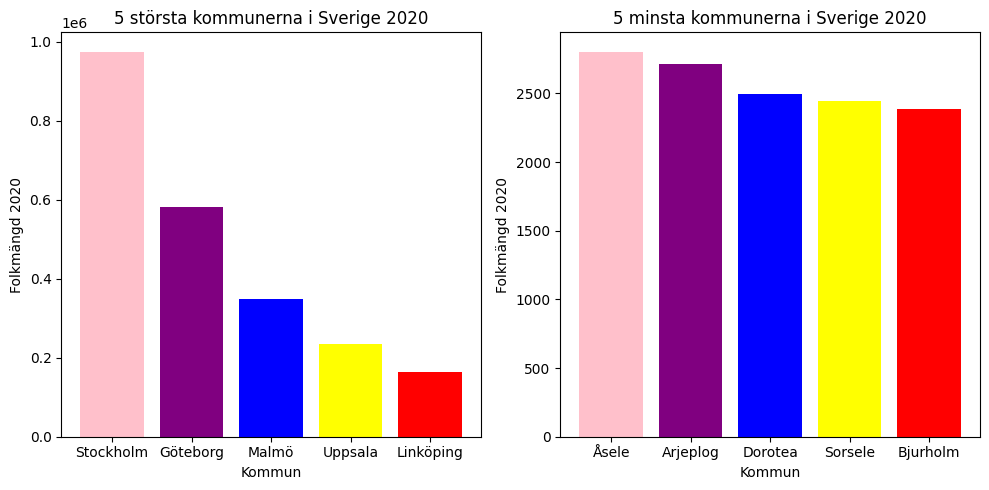

In [346]:
# Övning 2f) Plot a bar chart for the five largest cities and the five smallest cities.
import matplotlib.pyplot as plt

df_sorted = df.sort_values('Folkmängd 2020', ascending=False)

five_largest = df_sorted.head(5)
five_smallest = df_sorted.tail(5)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.bar(five_largest['Kommun'], five_largest['Folkmängd 2020'], color=['Pink', 'Purple', 'Blue', 'Yellow', 'red'])
plt.title("5 största kommunerna i Sverige 2020")
plt.xlabel('Kommun')
plt.ylabel('Folkmängd 2020')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(five_smallest['Kommun'], five_smallest['Folkmängd 2020'], color=['Pink', 'Purple', 'Blue', 'Yellow', 'red'])
plt.title("5 minsta kommunerna i Sverige 2020")
plt.xlabel('Kommun')
plt.ylabel('Folkmängd 2020')
plt.tight_layout()
plt.show()


## Övning 3 Cities in Sweden - Gender

In [347]:
# Övning 3a) Read the sheets "Kvinnor och Män" into two additional DataFrames. Clean your Data.

# Läs in excelfilen och välj sheet_name: Män & Kvinnor
file = '../../Data/komtopp50_2020.xlsx'
df_new = pd.read_excel(file, sheet_name=['Män', 'Kvinnor'])

def clean_columns(df):
    df = df.dropna()
    df = df.drop_duplicates()
    
    # Fixa till kolumnernas namn
    df.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']

    df['Folkmängd 2019'] = df['Folkmängd 2019'].astype(int)
    df['Rang 2019'] = df['Rang 2019'].astype(int)
    return df

df_female = pd.DataFrame(df_new['Kvinnor'])
df_male = pd.DataFrame(df_new['Män'])

df_female = clean_columns(df_female)
df_male = clean_columns(df_male)

df_male['Kön'] = 'Man'
df_female['Kön'] = 'Kvinna'

print(df_male.head().reset_index(drop=True))
print(df_female.head().reset_index(drop=True))


  Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring  \
0        81         83       Ale          16256           16054   1.258253   
1        64         64  Alingsås          20702           20646   0.271239   
2       122        123   Alvesta          10367           10339   0.270819   
3       255        255     Aneby           3503            3498   0.142939   
4       169        168    Arboga           7094            7114  -0.281136   

   Kön  
0  Man  
1  Man  
2  Man  
3  Man  
4  Man  
  Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring  \
0        84         85       Ale          15612           15348   1.720094   
1        64         64  Alingsås          20900           20774   0.606527   
2       123        123   Alvesta           9857            9795   0.632976   
3       255        255     Aneby           3318            3350  -0.955224   
4       165        164    Arboga           6945            6973  -0.401549   

      Kö

In [348]:
# Övning 3b) Merge the male and female DataFrames vertically and set index to "Kommun"

# pd.concat() används för att kombinera de två DataFrames vertikalt, vilket innebär att rad för rad placeras under varandra. 
# ignore_index=True används för att återställa indexet (så det inte dubbleras).
# set_index() används för att göra "Kommun" till radindex, vilket är praktiskt när du vill slå upp specifika kommuner senare.
# inplace=True: Denna parameter gör att ändringen att sätta index till "Kommun" sker direkt i df_combined utan att behöva skapa en ny variabel.

df_merge = pd.concat([df_male, df_female])
df_merge.drop(['Rang 2020', 'Rang 2019'], axis=1, inplace=True)
df_merge.set_index('Kommun')

df_merge

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
6,Ale,16256,16054,1.258253,Man
7,Alingsås,20702,20646,0.271239,Man
8,Alvesta,10367,10339,0.270819,Man
9,Aneby,3503,3498,0.142939,Man
10,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...
291,Österåker,22997,22442,2.473042,Kvinna
292,Östhammar,10846,10803,0.398038,Kvinna
293,Östra Göinge,7270,7262,0.110162,Kvinna
294,Överkalix,1559,1578,-1.204056,Kvinna


In [349]:
# Övning 3c) Extract and change column name from the total DataFrame.
# axis=0 innebär att operationen utförs på rader. Det vill säga, man vill lägga till eller ta bort rader.
# axis=1 innebär att operationen utförs på kolumner. Det vill säga, man vill lägga till eller ta bort kolumner

file_path1 = '../../Data/komtopp50_2020.xlsx'
df_total = pd.read_excel(file_path1, sheet_name='Totalt')

df.drop(['Rang 2020', 'Rang 2019'], axis=1, inplace=True) # axis=1 är att ta bort på kolumn nivå, axis=0 är på rad nivå
df.rename(columns={'Folkmängd 2020':'Total Pop 2020', 'Folkmängd 2019': 'Total Pop 2019', 'Förändring': 'Total Förändring'}, inplace=True)
df


,Kommun,Total Pop 2020,Total Pop 2019,Total Förändring
6,Ale,31868,31402,1.483982
7,Alingsås,41602,41420,0.439401
8,Alvesta,20224,20134,0.447005
9,Aneby,6821,6848,-0.394276
10,Arboga,14039,14087,-0.340740
...,...,...,...,...
291,Österåker,46644,45574,2.347830
292,Östhammar,22251,22250,0.004494
293,Östra Göinge,15017,15007,0.066636
294,Överkalix,3289,3315,-0.784314


In [350]:
# Övning 3d) Merge this data with the data in b. So that the head adds collumn 'Total Pop 2019-2020' and 'Total Förändring'. 

frames_combined = pd.merge(df_merge, df, on='Kommun', how='outer').sort_values('Total Pop 2020', ascending=False)

frames_combined


,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring
396,Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
397,Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
115,Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.651670
114,Göteborg,292505,290308,0.756782,Man,583056,579281,0.651670
269,Malmö,175411,173543,1.07639,Kvinna,347949,344166,1.099179
...,...,...,...,...,...,...,...,...
59,Dorotea,1171,1195,-2.008368,Kvinna,2498,2551,-2.077617
388,Sorsele,1285,1319,-2.57771,Man,2442,2489,-1.888309
389,Sorsele,1157,1170,-1.111111,Kvinna,2442,2489,-1.888309
25,Bjurholm,1154,1159,-0.431406,Kvinna,2387,2408,-0.872093


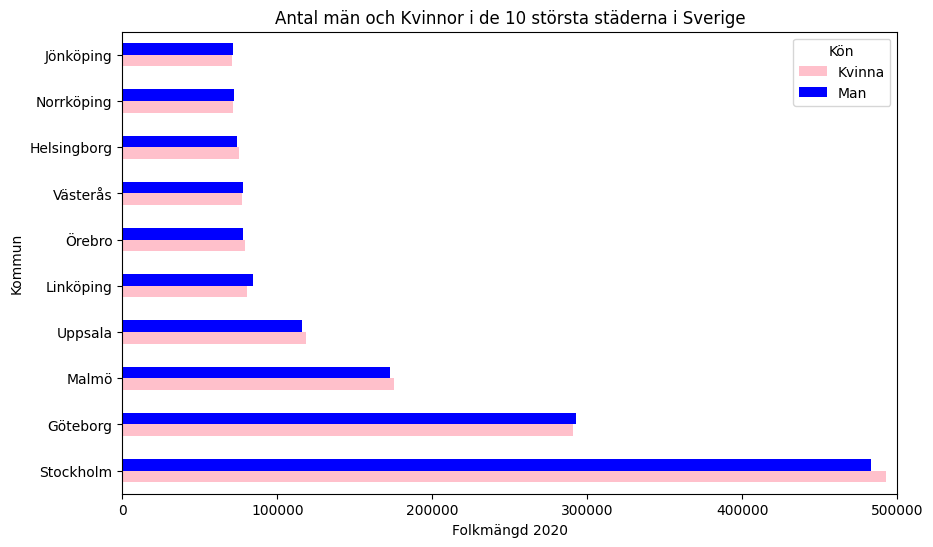

In [355]:
# Övning 3e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities.

import matplotlib.pyplot as plt

df_grouped = frames_combined.groupby(['Kommun', 'Kön',])['Folkmängd 2020'].sum().unstack('Kön')

df_grouped = df_grouped.apply(pd.to_numeric, errors='coerce')

largest_10_cities = df_grouped.sum(axis=1).nlargest(10).index
df_largest_10 = df_grouped.loc[largest_10_cities]

df_largest_10.plot(kind='barh', figsize=(10,6), color=["Pink", "Blue"])
plt.title("Antal män och Kvinnor i de 10 största städerna i Sverige")
plt.xlabel("Folkmängd 2020")
plt.ylabel("Kommun")
plt.legend(title="Kön")
plt.xlim(0, 500000)
plt.show()
